[ 4.713  4.939  5.165  5.391  5.617  5.843  6.069  6.295  6.521  6.747
  6.973  7.199  7.425  7.651  7.877  8.103  8.329  8.555  8.781  9.007
  9.233  9.459  9.685  9.911 10.137 10.363 10.589 10.815 11.041 11.267
 11.493 11.719 11.945 12.171 12.397 12.623 12.849 13.075 13.301 13.527
 13.753 13.979 14.205 14.431 14.657 14.883 15.109 15.335 15.561 15.787]
[0.00553443 0.01937051 0.02767216 0.02767216 0.04427546 0.03597381
 0.08024927 0.16326576 0.14942968 0.204774   0.24351503 0.46489233
 0.26565276 0.26288554 0.26288554 0.31269543 0.18263627 0.12729195
 0.16049854 0.24351503 0.10515422 0.0857837  0.07194762 0.17710184
 0.08024927 0.08855092 0.09961978 0.04980989 0.03320659 0.03320659
 0.08301649 0.0166033  0.05257711 0.01383608 0.04427546 0.02213773
 0.01937051 0.00830165 0.01937051 0.00276722 0.00830165 0.00276722
 0.00276722 0.         0.         0.         0.00553443 0.
 0.01106886 0.00276722]


/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and

bestdata:  <scipy.stats._continuous_distns.exponnorm_gen object at 0x182155a3c8>


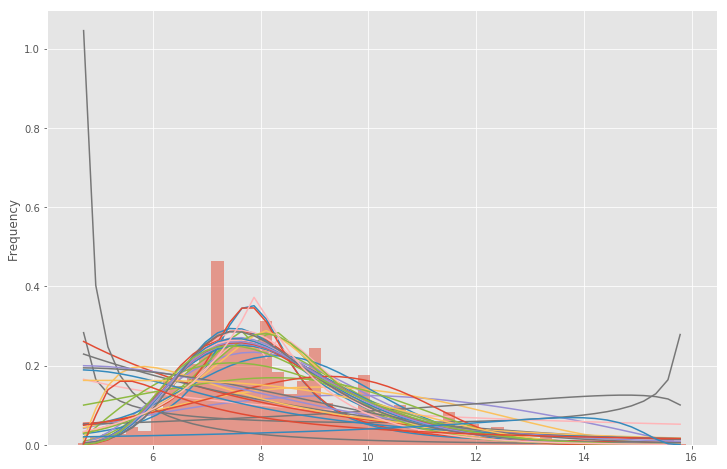

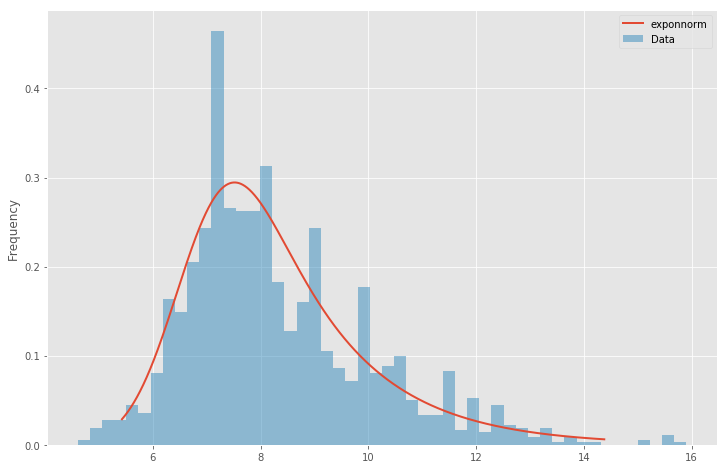

In [147]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

def best_fit_distribution(data,bins=50,ax=True):
  
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x+np.roll(x,-1))[:-1]/2.0
    print(x)
    print(y)
    
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    
    best_distribution = st.norm
    best_params = (0.0,1.0)
    best_sse = np.inf
    
    try:
        for distribution in DISTRIBUTIONS:
            params = distribution.fit(data)
            arg = params[:-2]
            loc = params[-2]
            scale = params[-1]

            pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
            sse = np.sum(np.power(y - pdf, 2.0))

            try:
                if ax:
                    pd.Series(pdf, x).plot(ax=ax)
                end
            except Exception:
                pass

            if best_sse > sse > 0:
                best_distribution = distribution
                best_params = params
                best_sse = sse
    except Exception:
        pass
    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=1600):

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

df = pd.read_csv('./winequality-red-cleaned.csv')
winedata = df['fixed acidity']
#print(winedata)
plt.figure(figsize=(12,8))
ax = winedata.plot(kind='hist', bins = 50, density=True, alpha=0.5)

best_fit_name, best_fit_params = best_fit_distribution(winedata.values, 50, ax)
best_dist = getattr(st, best_fit_name)
print('bestdata: ',best_dist)
dataYLim = ax.get_ylim()

pdf = make_pdf(best_dist, best_fit_params)

plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label=best_fit_name, legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)




